In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2024-06-09 12:22:19--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2024-06-09 12:22:19--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48574 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.44K  --.-KB/s    in 0.008s  

2024-06-09 12:22:19 (5.90 MB/s) - ‘thinkdsp.py’ saved [48574/48574]



# Упражнение 6.1

В этой главе утверждается, что analyze1 требует времени пропорционально n^3, а analyze2 — пропорционально n^2. Убедитесь в этом, запуская их с несколькими разными массивами и засекая время рабо ты. В блокнотах Jupyter можно использовать «волшебную команду» %timeit.

Если печатать зависимость времени работы от размера на логарифмической шкале, то получится прямая линия с уклоном 3 для analyze1 и с уклоном 2 для analyze2.

Также стоит поупражняться с dct_iv и scipy.fftpack.dct.

In [2]:
import numpy as np
import scipy.fftpack

def analyze1(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(np.pi * 2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

def analyze2(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(np.pi * 2 * args)
    amps = M.dot(ys) / 2
    return amps

def scipy_dct(ys, fs, ts):
    return scipy.fftpack.dct(ys, type=3)

In [3]:
from thinkdsp import UncorrelatedGaussianNoise
from scipy.stats import linregress

loglog = dict(xscale='log', yscale='log')

def plot_bests(ns, bests):
    plt.plot(ns, bests)
    decorate(**loglog)

    x = np.log(ns)
    y = np.log(bests)
    t = linregress(x,y)
    slope = t[0]

    return slope

signal = UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=1.0, framerate=16384)
wave.ys.shape

def run_speed_test(ns, func):
    results = []
    for N in ns:
        print(N)
        ts = (0.5 + np.arange(N)) / N
        freqs = (0.5 + np.arange(N)) / 2
        ys = wave.ys[:N]
        result = %timeit -r1 -o func(ys, freqs, ts)
        results.append(result)

    bests = [result.best for result in results]
    return bests

In [4]:
ns = 2 ** np.arange(6, 13)
ns

array([  64,  128,  256,  512, 1024, 2048, 4096])

In [5]:
bests = run_speed_test(ns, analyze1)

64
256 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
128
2.11 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
256
5.33 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
512
26.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
1024
91.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
2048
409 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4096
2.32 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [6]:
bests2 = run_speed_test(ns, analyze2)

64
94.8 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
128
547 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
256
2.13 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
512
8.62 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
39 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
2048
166 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4096
676 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
bests3 = run_speed_test(ns, scipy_dct)

64
6.57 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
128
7.17 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
256
7.76 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
512
9.45 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
1024
20.2 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
2048
36 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
4096
37.9 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)


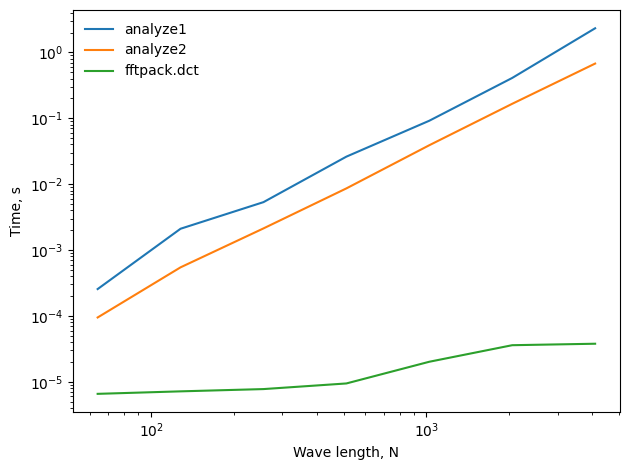

In [8]:
import matplotlib.pyplot as plt
from thinkdsp import decorate

plt.plot(ns, bests, label='analyze1')
plt.plot(ns, bests2, label='analyze2')
plt.plot(ns, bests3, label='fftpack.dct')
decorate(xlabel='Wave length, N', ylabel='Time, s', **loglog)

Из графика видно, что как analyze1, так и analyze2, демонстрируют квадратичную зависимость от размера данных, возможно, это характерно только для данного диапазона размеров. Однако fftpack.dct показал значительно лучший результат.


# Упражнение 6.2

Одно из основных применений ДКП - это сжатие звука и изображений. В простейшей форме ДКП при сжатии работает следующим образом:

Разбивает длинный сигнал на сегменты.

Вычисляет ДКП каждого сегмента.

Определяет частотные компоненты с такой амплитудой, что их не слышно, и удаляет их, сохраняя только оставшиеся частоты и амплитуды.

При воспроизведении сигнала загружает частоты и амплитуды каждого сегмента и применяет обратное ДКП.

Реализуйте версию этого алгоритма и примените его для записи музыки или речи. Сколько компонент можно удалить до того, как разница станет заметной?

Для того, чтобы этот метод стал практичным, нужен способ хранения прореженного массива, то есть массива, где большинство элементов равно нулю. NumPy (SciPy)дает несколько способов работы с прореженными массивами; о них можно прочитать на веб-странице http://docs.scipy.org/doc/scipy/reference/sparse.html

In [9]:
def filter(dct,limit = 0):
    for i, amp in enumerate(dct.amps):
        if np.abs(amp) < limit:
              dct.hs[i] = 0

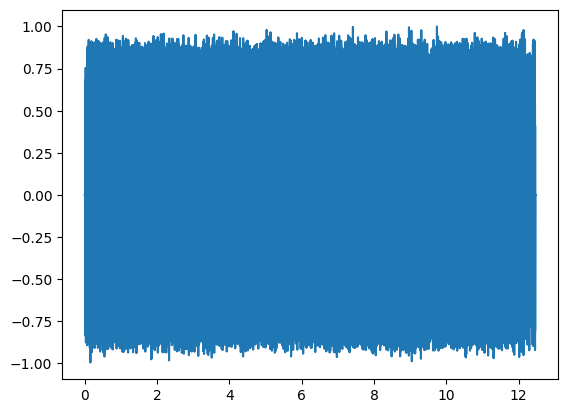

In [10]:
from thinkdsp import read_wave

wave = read_wave('shaman.wav')
wave.plot()
wave.normalize()
wave.make_audio()

In [13]:
segment = wave.segment(start=8, duration=1.0)
segment.normalize()
segment.make_audio()

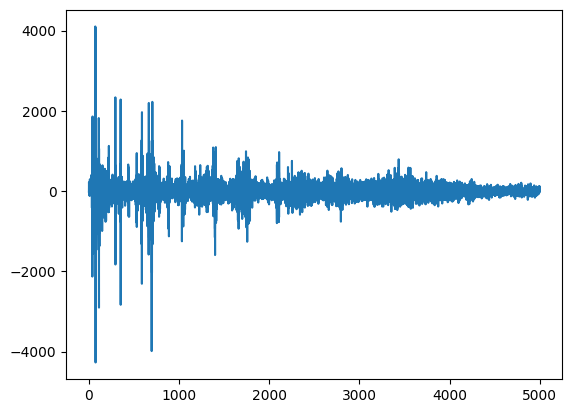

In [14]:
dct = segment.make_dct()
dct.plot(high = 5000)

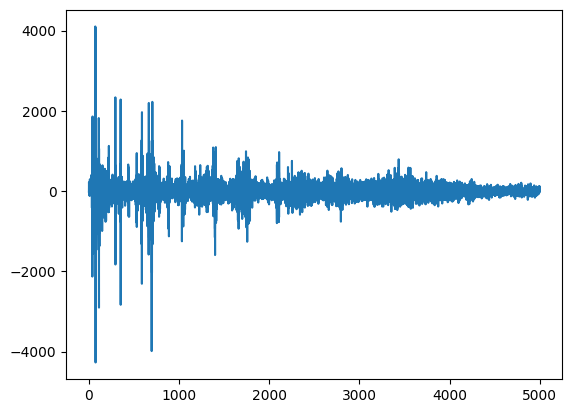

In [15]:
dct.plot(high = 5000)
dct.make_wave().make_audio()

При установке порогового значения на уровне 100, звук в значительной степени напоминает исходный до сжатия.

In [16]:
filter(dct,1000)

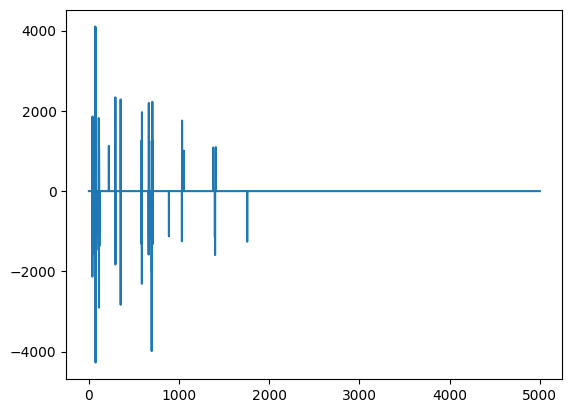

In [17]:
dct.plot(high = 5000)
dct.make_wave().make_audio()

При пороге 1000 сегмент все еще узнаваем, хотя становится сложнее различать отдельные голоса и ноты мелодии.

In [18]:
filter(dct,2000)

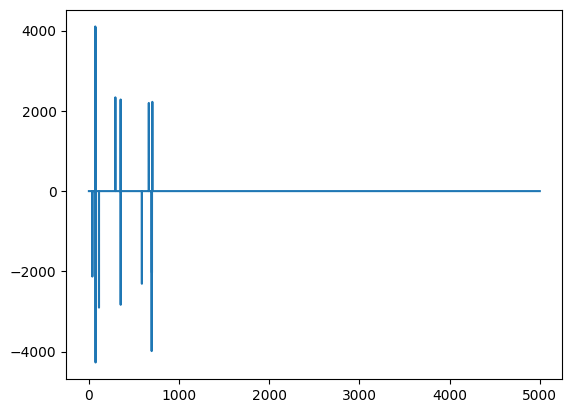

In [19]:
dct.plot(high = 5000)
dct.make_wave().make_audio()

При этом пороговом значении полностью пропадает ощущение ритма. Звук становится похожим на один длинный аккорд с эхом.

# Упражнение 6.3

В репозитории этой книги есть блокнот Jupyter под названием phase.ipnyb, в котором исследуется влияние фазы на восприятие звука. Прочтите этот блокнот и «погоняйте» примеры. Выберите иной сегмент звука и повторите эксперименты. Можно ли найти некие общие соотношения в фазовой структуре звука и его восприятии?

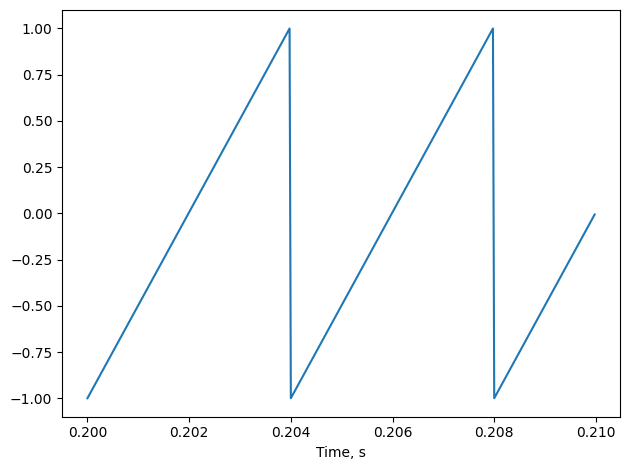

In [20]:
from thinkdsp import SawtoothSignal

signal = SawtoothSignal(freq=250, offset=0)
wave = signal.make_wave(duration=0.5, framerate=40000)
wave.segment(start=0.2,duration=0.01).plot()
decorate(xlabel='Time, s')
wave.make_audio()

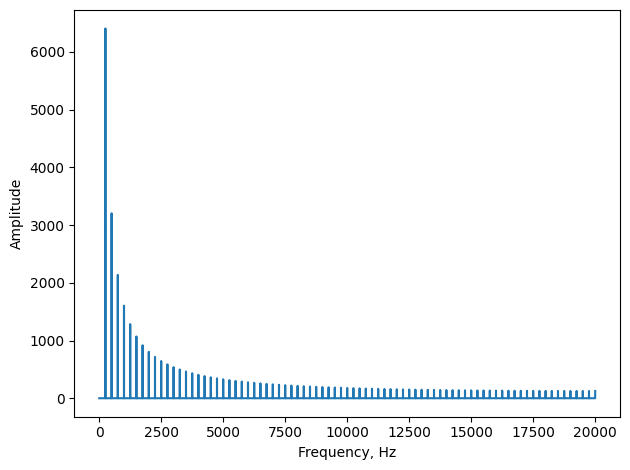

In [21]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency, Hz',
         ylabel='Amplitude')

In [22]:
def plot_angle(spectrum, thresh=1):
    angles = spectrum.angles
    angles[spectrum.amps < thresh] = np.nan
    plt.plot(spectrum.fs, angles, 'x')
    decorate(xlabel='Frequency, Hz',
             ylabel='Phase, rad')

In [23]:
def plot_three(spectrum, thresh=1):
    plt.figure(figsize=(10, 4))
    plt.subplot(1,3,1)
    spectrum.plot()
    plt.subplot(1,3,2)
    plot_angle(spectrum, thresh=thresh)
    plt.subplot(1,3,3)
    wave = spectrum.make_wave()
    wave.unbias()
    wave.normalize()
    wave.segment(duration=0.01).plot()
    display(wave.make_audio())

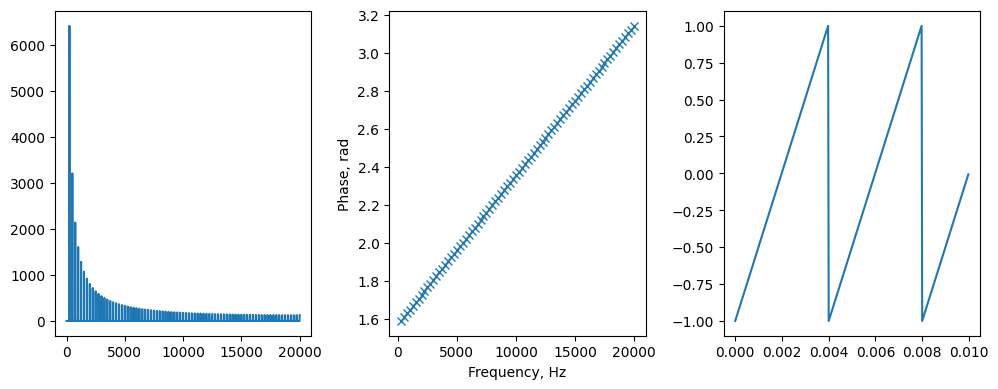

In [24]:
plot_three(spectrum)

Зададим значение всем значимым фазам – 0:

In [25]:
def zero_angle(spectrum):
    res = spectrum.copy()
    res.hs = res.amps
    return res

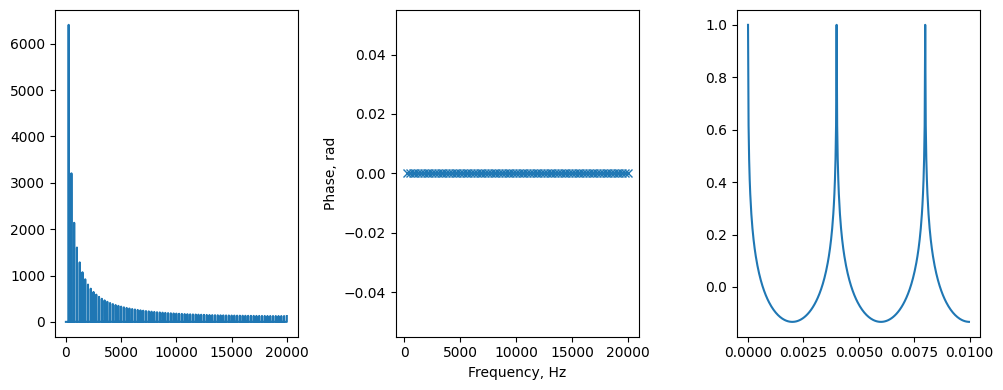

In [26]:
spectrum2 = zero_angle(spectrum)
plot_three(spectrum2)


Можно заметить, что форма сигнала претерпела значительные изменения, но звучание осталось неизменным. Единственное заметное отличие - изменение громкости, однако, как указано в руководстве, это связано с нормализацией, а не с изменениями фазы.

Давайте выберем ненулевой угол для значения фазы.

In [27]:
def rotate_angle(spectrum, offset):
    res = spectrum.copy()
    res.hs *= np.exp(1j * offset)
    return res

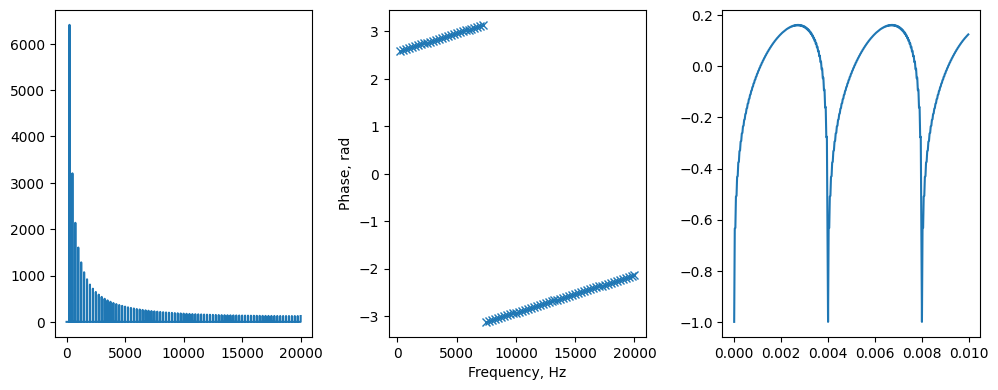

In [28]:
spectrum3 = rotate_angle(spectrum, 1)
plot_three(spectrum3)

Точно так же: форма сигнала снова претерпела значительные изменения, но звучание осталось неизменным.

Давайте попробуем установить случайное значение фазы.

In [29]:
def random_angle(spectrum):
    res = spectrum.copy()
    angles = np.random.uniform(0, np.pi * 2, len(spectrum))
    res.hs *= np.exp(1j * angles)
    return res

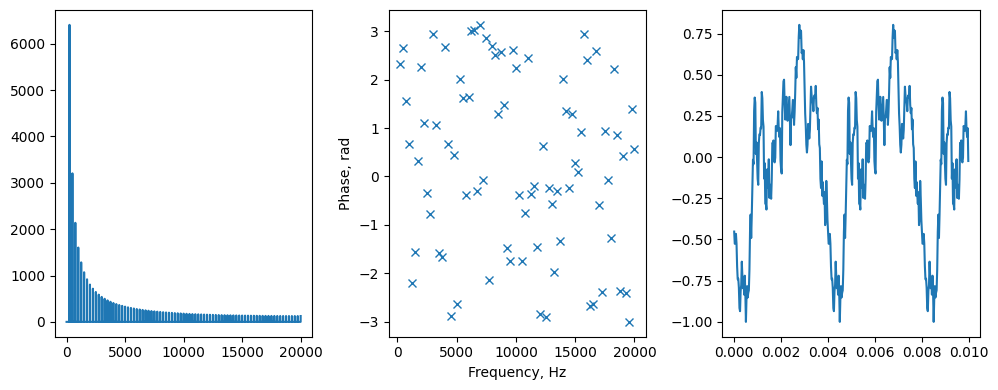

In [30]:
spectrum4 = random_angle(spectrum)
plot_three(spectrum4)

Только при этом условии возникает явное изменение в звучании сигнала. Звук становится более "звенящим".

Из рассмотренных примеров можно сделать вывод, что человек, в большинстве случаев, не обращает внимания на изменения фазы сигнала.